In [ ]:
import pandas as pd


In [ ]:
# Downloading the datasets using wget
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv

--2024-12-08 08:48:21--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.160.194, 16.12.40.2, 52.219.160.154, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.160.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.22M  10.8MB/s    in 19s     

2024-12-08 08:48:41 (3.90 MB/s) - ‘train.csv’ saved [76775041/76775041]

--2024-12-08 08:48:41--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.

In [ ]:
# creating the dataframes
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
train_x = train_df.drop(columns=['label'])
train_y=train_df['label']

In [ ]:
from sklearn.model_selection import train_test_split as tts
train_x_split,validation_x_split,train_y_split,validation_y_split = tts(train_x,train_y,test_size=0.2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV as gscv
hy_params = {
    "n_neighbors": [10,15],
    "p" : [1,2]
}
clf = gscv(KNN(),hy_params,scoring="accuracy",n_jobs = 3 ,refit=True, cv = 2,verbose=1)
clf.fit(train_x,train_y)
print(clf.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'n_neighbors': 10, 'p': 2}


In [ ]:
best_model = clf.best_estimator_
predicted_test_y = best_model.predict(test_x)
predicted_test_y

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
predicted_test_y = pd.DataFrame(predicted_test_y)
predicted_test_y.columns = ['Label']
predicted_test_y.insert(loc=0, column='ImageId', value=predicted_test_y.index + 1)
print(predicted_test_y)

predicted_test_y.to_csv('submission.csv', index=False)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      4
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualise(image_df):
    image_1D = image_df.to_numpy()
    image_2D = image_1D.reshape((28,28))
    plt.imshow(image_2D, cmap=plt.get_cmap('gray'))
    plt.show()

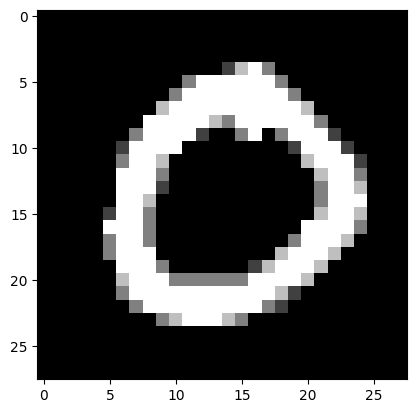

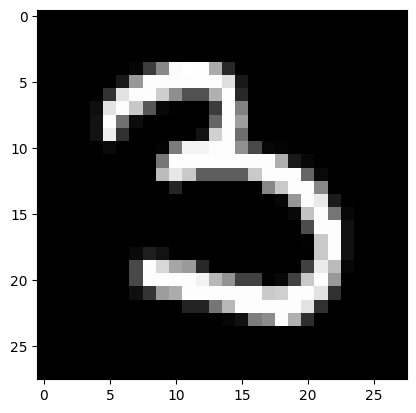

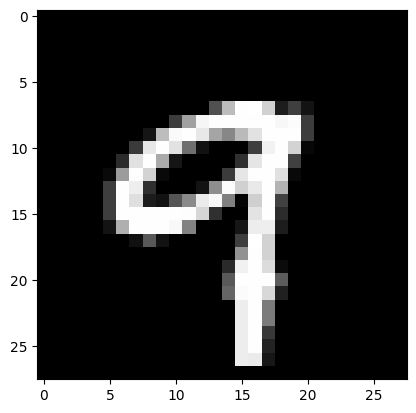

Predictions: [0 3 9]
Validation Accuracy: 97.17%


In [ ]:
visualise(test_df.loc[13])
visualise(test_df.loc[16])
visualise(test_df.loc[20])
prediction_input = test_df.loc[[13, 16 , 20]]  # Pass rows as DataFrame
predictions = clf.predict(prediction_input)
print("Predictions:", predictions)
accuracy = clf.score(validation_x_split, validation_y_split)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
